#Task 1

A mechanical system under the gravity force moves from the rest. Define the velocity of object $A$ if it travels distance $s$ from the rest. The masses of the non-deformable ropes are ignored. Neglect the masses of links $FK,\ KC$ and the piston $K$.

The task is to:
1. make a plot $v_A(s)$;
2. What will change if we omit the last sentence (Neglect ...). (Explain it and show on equations). Why Yablonskii made these constraints?

Needed variables:

- $m_A=1,\ m_B=3,\ m_D=20$ (kg);
- $R_B=20,\ R_D=20,\ i_{Bx}= 18$ (cm), $i_{Bx}$ -- radii of gyration of the body;
- $\psi = 0.6$ (cm), where $\psi$ is rolling friction.


![HW8.1](https://drive.google.com/uc?export=view&id=1UP2zwKZCEzBEk1jSoxkcUuwFDBBAELrQ)


#Solution

**Research object**:  system of a body A, wheels B, wheel D.

**Motion**: A - plane motion, B - rotational motion, D - rotational and plane motions

**Force analysis**: F_fr = $\psi$ N

#Euler-Lagrange method

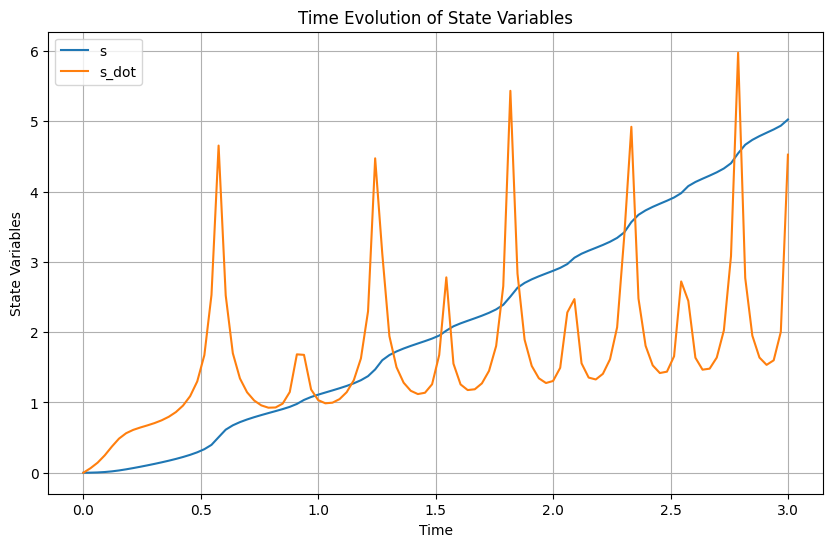

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.integrate import odeint
import sympy as sp
from sympy import Point

# Define constants
Rb = 0.20
r = 0.8*Rb
rb = 0.8*Rb
FK = 4*rb
Rd = 0.20
KC = 3*rb

m_a = 1
m_d = 20
m_b = 3

i_bx = 0.18
g = 9.8
c = 0.6


# Define system's parameters
J_b = m_b *i_bx**2
J_d = m_d*Rd**2/2

t = sp.symbols('t')
s = sp.Function('s')(t)
dot_s = s.diff(t)
ddot_s = dot_s.diff(t)

alpha = s/rb

F = Point(Rb*sp.cos(alpha), Rb*sp.sin(alpha))

x = sp.symbols('x')
eq = (x - sp.cos(alpha)*Rb)**2 + sp.sin(alpha)**2*Rb**2 - FK**2
K = sp.solve(eq, x)[1]
V_d = K.diff(t)


T_A = m_a*dot_s**2/2
T_B_rot = (dot_s/r)**2 * J_b/2
T_D_rot = m_d*V_d**2/4
T_D = m_d*V_d**2/2
T = T_A + T_B_rot + T_D_rot + T_D

V = -m_a*g*s
L = T-V

dx_ds = K.diff(s)
F_fr = c*m_d*g
Q_fr = -F_fr*dx_ds

dL_dds = L.diff(dot_s)
dL_ds = L.diff(s)
dt_dL_dds = dL_dds.diff(t)

eq = dt_dL_dds - dL_ds - Q_fr
sol = sp.solve(eq, ddot_s)


def state_space(state, t):
  s_val, s_dot_val = state
  s_ddot = sol[0].subs(dot_s, s_dot_val).subs(s, s_val).evalf()
  return [s_dot_val, s_ddot]

initial_condition = [0, 0]
ts = np.linspace(0, 3, 100)
solution = odeint(state_space, initial_condition, ts)


s_vals = solution[:, 0]
s_dot_vals = solution[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ts, s_vals, label='s')
plt.plot(ts, s_dot_vals, label='s_dot')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('Time Evolution of State Variables')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import sympy as sp
import numpy as np
from sympy import Point, cos, sin, sqrt, pi, Matrix, Line
from sympy.geometry import Circle

###################################
Rb = 0.20
r = rb = 0.8*Rb
l = 0.30
FK = 4*0.8*Rb
Rd = 0.20
KC = 0.40


O1 = Point(0, 0)
big_wheel = Circle(O1, Rb)
small_wheel = Circle(O1, r)
O2 = Point(-r, 0)

t_vec = np.linspace(0, np.pi, 130)
phi_vals = [s/rb for s in s_vals]

A_vals = [Point(-r, -l-s) for s in s_vals]
F_vals = [Rb * Point([cos(phi), sin(phi)]) + O1 for phi in phi_vals]
K_vals = [sorted(Circle(Point(F.x, F.y), FK).intersection(Line(O1, Point(50, 0))), key=lambda p: p[0].subs({F.x: 1, F.y: 0}))[1] for F in F_vals]
C_vals = [Point(K.x+KC, K.y+0) for K in K_vals]

In [18]:
from sympy import *
from sympy import Symbol, Ellipse, Point, Line, Circle, Matrix, diff
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.lines as mlines
import numpy as np


points_vals = zip(A_vals, F_vals, K_vals, C_vals)



points_names = ["A", "F", "K", "C"]

states = points_vals

fig, ax = plt.subplots()
ax.set_aspect("equal")


xdata, ydata = [], []
ln, = plt.plot([], [], 'b-')

vectors = []
points  = []

titles  = []
lines   = []

# Animation initialisation
def init_model():
    ax.set_xlim(-1, 2)
    ax.set_ylim(-2, 1)
    plt.title('Simulation')
    return ln,


# Remove all the previous points, labels, vectors
def clear_screen():
    if len(ax.patches):
        ax.patches[-1].remove()

    while len(points):
        for item in points[-1]:
            item.remove()
        points.pop()

    while len(lines):
        for item in lines[-1]:
            item.remove()
        lines.pop()

    while len(titles):
        titles[-1].remove()
        titles.pop()

    while len(vectors):
        vectors[-1].remove()
        vectors.pop()

# Animation update on each frame
def update_model(state):

    clear_screen()

    (A, F, K, C) = state

    titles.extend([
        ax.text(i[0][0], i[0][1] + 0.1, i[1], fontsize=10)
        for i in zip((A, F, K, C), ("A", "F", "K", "C"))
    ])

    circle_plot_1 = plt.Circle((O1.x, O1.y), Rb, color='r', fill=False)  # Circle with radius Rb
    circle_plot_2 = plt.Circle((O1.x, O1.y), 0.8 * Rb, color='b', fill=False)  # Circle with radius 0.8*Rb
    circle_plot_3 = plt.Circle((K.x+KC, O1.y), Rd, color='b', fill=False)  # Circle with radius 0.8*Rb

    ax.add_artist(circle_plot_1)
    ax.add_artist(circle_plot_2)
    ax.add_artist(circle_plot_3)


    lines.extend([
        plt.plot([F[0], K[0]], [F[1], K[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([K[0], C[0]], [K[1], C[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([O2[0], A[0]], [O2[1], A[1]], linestyle="solid", linewidth=2, color="blue"),
        # plt.plot([T[0], R[0]], [T[1], R[1]], linestyle="solid", linewidth=2, color="blue"),
        # plt.plot([A[0], Q[0]], [A[1], Q[1]], linestyle="solid", linewidth=2, color="blue"),

    ])


    # Draw all moving points
    points.extend([
        plt.plot(i[0], i[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        for i in (A, F, K, C)
    ])
    return ln,

def add_legend():
  legend_entries = [
    mlines.Line2D([], [], color='black', marker='_', linestyle='None', markersize=10, label='mg'),
    mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='N'),
    mlines.Line2D([], [], color='green', marker='_', linestyle='None', markersize=10, label='F_centripetal'),
    mlines.Line2D([], [], color='orange', marker='_', linestyle='None', markersize=10, label='F_coriolis'),
    mlines.Line2D([], [], color='red', marker='_', linestyle='None', markersize=10, label='Acceleration (normal)'),
    mlines.Line2D([], [], color='magenta', marker='_', linestyle='None', markersize=10, label='Acceleration (coriolis)'),
  ]

  ax.legend(handles=legend_entries, loc='upper right')

anim = FuncAnimation(fig, update_model, frames=states,
                        init_func=init_model, blit=True)


from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close(fig)

<ipython-input-18-5e453913741d>:115: UserWarning: frames=<zip object at 0x7fd40e3b73c0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, update_model, frames=states,


#Task 2

You have a cart pole. Body $1$ is a slider, mass $m_1$, it moves without friction.

$AB$ is a massless rod with length $l$. Body $2$ with mass $m_2$ is connected to $AB$ at point $B$.

It's a 2 DoF system. You should take $x$ and $\phi$ as representations of this system. The origin of each coordinate should be the same as in the picture.

**Initial conditions:**
1. $x = 0$, $\phi = 10^\circ$, $\dot{x} = 0$, $\dot{\phi} = 0$, $t=0$;
2. $x = 0.5$, $\phi = 45^\circ$, $\dot{x} = 0$, $\dot{\phi} = 0$, $t=0$;
3. $x = 0.5$, $\phi = -135^\circ$, $\dot{x} = 0$, $\dot{\phi} = 0$, $t=0$;

**Parameters:** $m_1 = 5\ \text{kg}$, $m_2 = 1\ \text{kg}$, $l = 1\ \text{m}$.


![HW8.2](https://drive.google.com/uc?export=view&id=18K5Bz6euVaN6IceDKWkNOluUen--Lx48)


**Research object**: A system of 2 bodies: cart and pole

**Motion**: A cart - plane motion, pole - rotational motio

**Force analysis**:  $G_1 = m_1 g$, $G_2 = m_2 g, T, N$


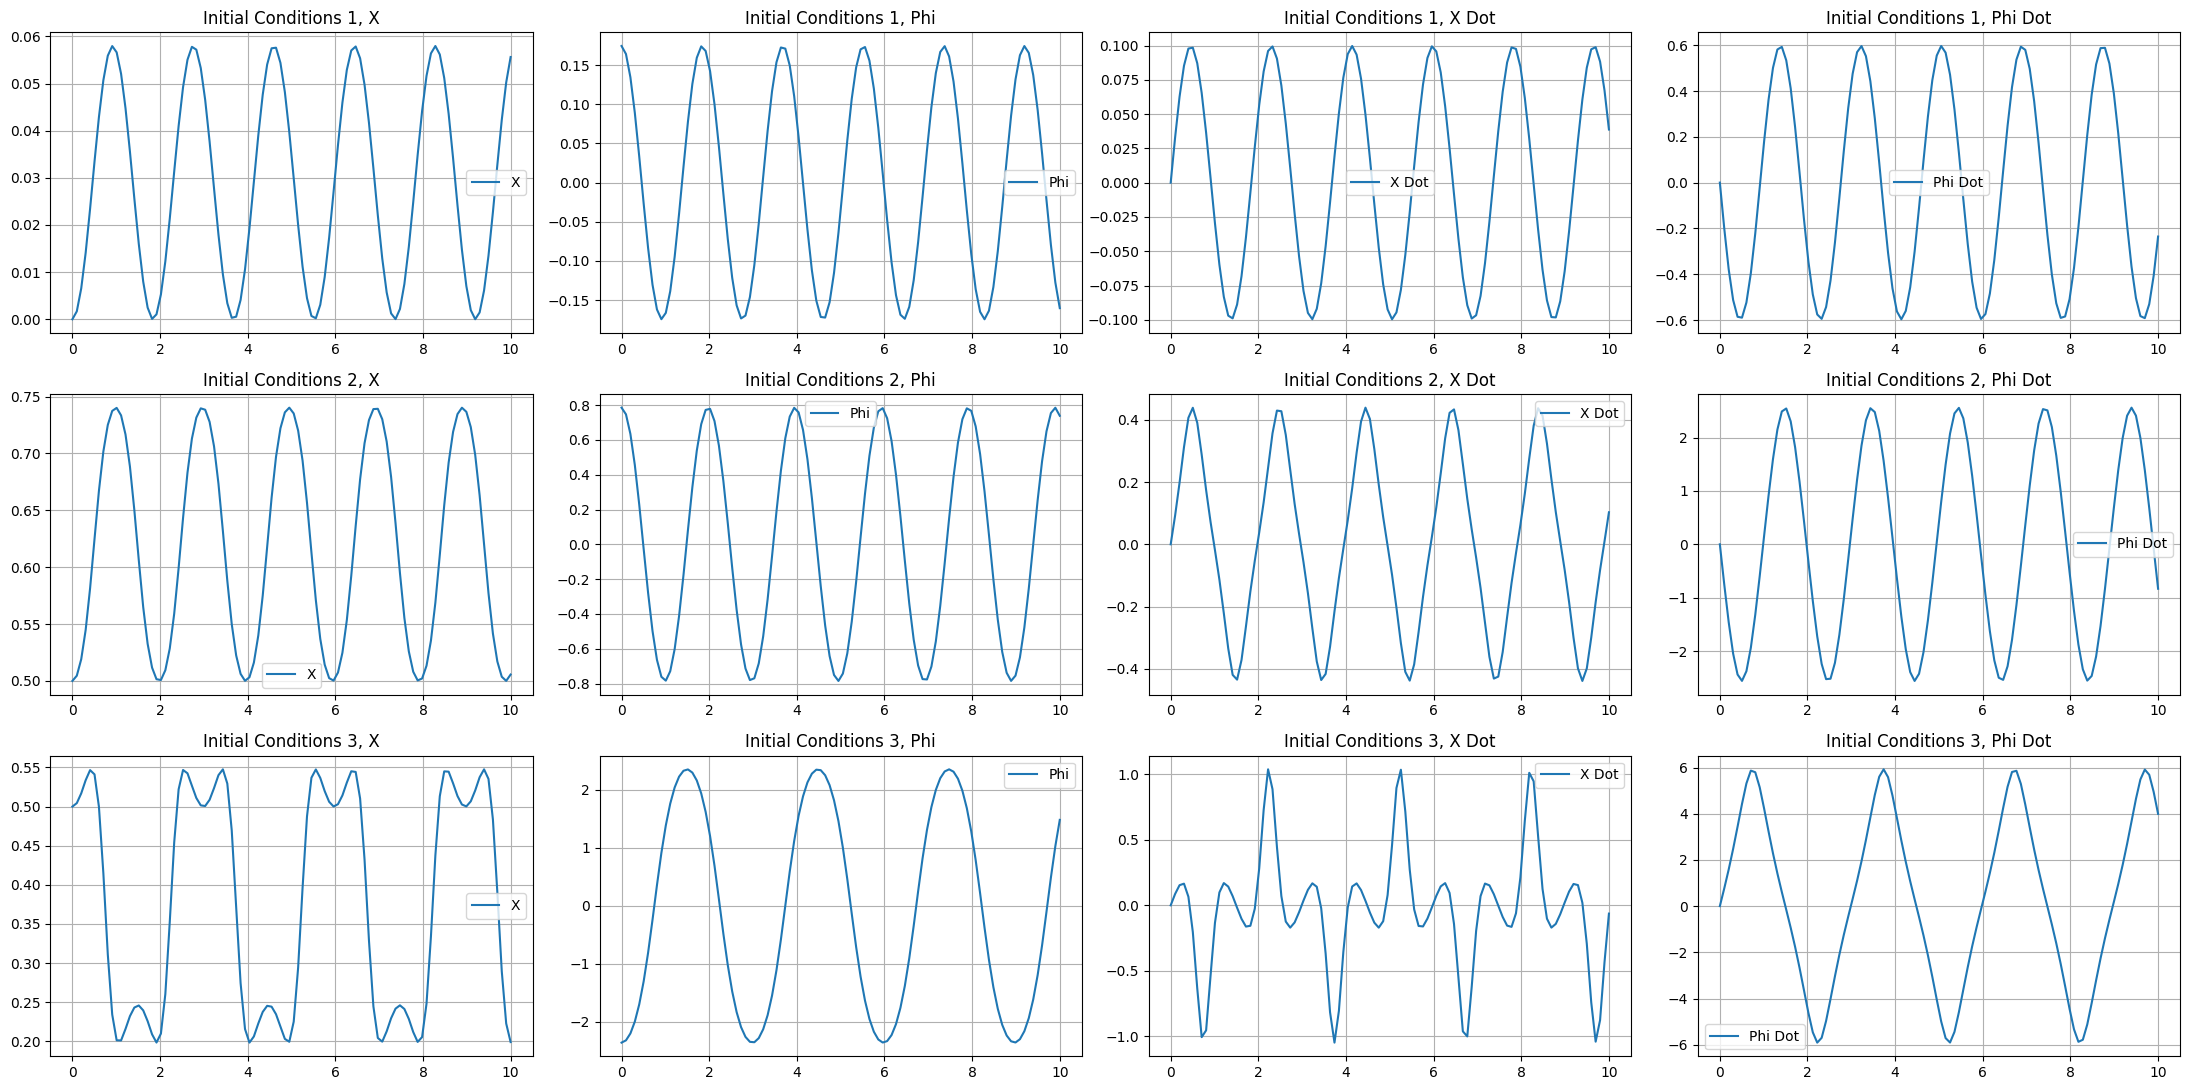

In [ ]:
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

m1 = 5
m2 = 1
l = 1
g = 9.8

t = sp.symbols('t')
x = sp.Function('x')(t)
phi = sp.Function('phi')(t)
dx_dt = x.diff(t)
ddx_dtt = dx_dt.diff(t)

dphi_dt = phi.diff(t)
ddphi_dtt = dphi_dt.diff(t)

L = (m1+m2)*dx_dt**2/2 + m2*dx_dt*l*dphi_dt*sp.cos(phi) + m2*l**2*dphi_dt**2/2 + m2*g*l*sp.cos(phi)


dL_dx = L.diff(x).evalf().doit()
dL_dphi = L.diff(phi).evalf().doit()
dL_ddx = L.diff(dx_dt).evalf().doit()
dL_ddphi = L.diff(dphi_dt).evalf().doit()

dt_dL_ddotx = dL_ddx.evalf().doit().diff(t).evalf().doit()
dt_dL_ddphi = dL_ddphi.evalf().doit().diff(t).evalf().doit()

L1 = dt_dL_ddotx - dL_dx
L2 = dt_dL_ddphi - dL_dphi

solution = sp.solve((L1, L2), (ddx_dtt, ddphi_dtt))

def state_space_model(state, t_val):
    phi_val, x_val, dphi_dt_val, dx_dt_val = state

    ddphi_ddt_val = solution[ddphi_dtt].subs(phi, phi_val).evalf().doit()                   #.subs({phi: phi_val, dphi_dt: dphi_dt_val, t: t_val}).evalf()
    ddx_ddt_val = solution[ddx_dtt].subs(dphi_dt, dphi_dt_val).subs(phi, phi_val).evalf().doit()                      #.subs({x: x_val, dx_dt: dx_dt_val, t: t_val}).evalf()

    # Return the derivatives
    return [dphi_dt_val, dx_dt_val, ddphi_ddt_val, ddx_ddt_val]
# initial_condition = [45*np.pi/180, 0, 0, 0]

initial_states = [
    [10.0/180*np.pi, 0.0, 0.0, 0.0],
    [45.0/180*np.pi, 0.5, 0.0, 0.0],
    [-135.0/180*np.pi, 0.5, 0.0, 0.0]
]

ts = np.linspace(0, 10, 100)

# Plotting
fig, axs = plt.subplots(len(initial_states), 4, figsize=(22, 11))

for i, initial_state in enumerate(initial_states):
    odeint_solution = odeint(state_space_model, initial_state, ts)
    phi_result, x_result, phi_dot_result, x_dot_result = odeint_solution[:, 0], odeint_solution[:, 1], odeint_solution[:, 2], odeint_solution[:, 3]
    axs[i, 0].plot(ts, x_result, label='X')
    axs[i, 0].set_title(f'Initial Conditions {i+1}, X')
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    axs[i, 1].plot(ts, phi_result, label='Phi')
    axs[i, 1].set_title(f'Initial Conditions {i+1}, Phi')
    axs[i, 1].legend()
    axs[i, 1].grid(True)
    axs[i, 2].plot(ts, x_dot_result, label='X Dot')
    axs[i, 2].set_title(f'Initial Conditions {i+1}, X Dot')
    axs[i, 2].legend()
    axs[i, 2].grid(True)
    axs[i, 3].plot(ts, phi_dot_result, label='Phi Dot')
    axs[i, 3].set_title(f'Initial Conditions {i+1}, Phi Dot')
    axs[i, 3].legend()
    axs[i, 3].grid(True)

plt.tight_layout()
plt.show()

#Simulation

In [ ]:

from sympy import *
from sympy import Symbol, Ellipse, Point, Line, Circle, Matrix, diff
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.lines as mlines
import numpy as np


points_vals = zip(A_eq, R_eq, E_eq, C_eq, T_eq, Q_eq)



points_names = ["A", "R", "E", "C", "T", "Q"]

states = points_vals

# fixed_points_with_names = [(O1, "O1")]


fig, ax = plt.subplots()
ax.set_aspect("equal")


xdata, ydata = [], []
ln, = plt.plot([], [], 'b-')

vectors = []
points  = []

titles  = []
lines   = []

# Animation initialisation
def init_model():
    ax.set_xlim(-30, 30)
    ax.set_ylim(-15, 20)
    plt.title('Simulation')
    return ln,


# Remove all the previous points, labels, vectors
def clear_screen():
    if len(ax.patches):
        ax.patches[-1].remove()

    while len(points):
        for item in points[-1]:
            item.remove()
        points.pop()

    while len(lines):
        for item in lines[-1]:
            item.remove()
        lines.pop()

    while len(titles):
        titles[-1].remove()
        titles.pop()

    while len(vectors):
        vectors[-1].remove()
        vectors.pop()

# Animation update on each frame
def update_model(state):

    clear_screen()

    (A, R, E, C, T, Q) = state

    titles.extend([
        ax.text(i[0][0], i[0][1] + 1, i[1], fontsize=10)
        for i in zip((A, R, E, C, T, Q), ("A", "R", "E", "C", "T", "Q"))
    ])

    # (A, O) = state
    # points.extend([
    #     plt.plot(point[0], point[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
    #     for (point, _) in fixed_points_with_names
    # ])

    # Plot all lines on the screen

    lines.append(plt.plot([RT_line.p1[0], RT_line.p2[0]], [RT_line.p1[1], RT_line.p2[1]], linestyle="solid", linewidth=1, color="black"))

    lines.extend([
        plt.plot([R[0], E[0]], [R[1], E[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([E[0], C[0]], [E[1], C[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([C[0], T[0]], [C[1], T[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([T[0], R[0]], [T[1], R[1]], linestyle="solid", linewidth=2, color="blue"),
        plt.plot([A[0], Q[0]], [A[1], Q[1]], linestyle="solid", linewidth=2, color="blue"),

    ])


    # Draw all moving points of interest on the screen
    points.extend([
        plt.plot(i[0], i[1], marker="o", markersize=3, markeredgecolor="black", markerfacecolor="black")
        for i in (A, R, E, C, T, Q)
    ])

    # add_legend()
    return ln,

def add_legend():
  legend_entries = [
    mlines.Line2D([], [], color='black', marker='_', linestyle='None', markersize=10, label='mg'),
    mlines.Line2D([], [], color='blue', marker='_', linestyle='None', markersize=10, label='N'),
    mlines.Line2D([], [], color='green', marker='_', linestyle='None', markersize=10, label='F_centripetal'),
    mlines.Line2D([], [], color='orange', marker='_', linestyle='None', markersize=10, label='F_coriolis'),
    mlines.Line2D([], [], color='red', marker='_', linestyle='None', markersize=10, label='Acceleration (normal)'),
    mlines.Line2D([], [], color='magenta', marker='_', linestyle='None', markersize=10, label='Acceleration (coriolis)'),
  ]

  ax.legend(handles=legend_entries, loc='upper right')

anim = FuncAnimation(fig, update_model, frames=states,
                        init_func=init_model, blit=True)


from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close(fig)